# 항공사 지연 요인 분석 보고서

## 1. 프로젝트 개요
- 분석 목적: 항공사의 지연 요인(운항사, 관제, 기상)을 파악하여 개선 방향 제시
- 데이터 출처: 항공 운항 지연률 데이터 (총 33,468건)
- 분석 대상 변수:
    - pct_carrier_delay: 운항사 요인
    - pct_atc_delay: 관제 요인
    - pct_weather_delay: 기상 요인
    - airline: 항공사명

**데이터 출처**: https://www.kaggle.com/datasets/pitterman/airline-stats   
항공사 지연 정보 데이터

In [263]:
# 라이브러리 로드하기

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [264]:
# 한글 폰트 설정

# 시스템 환경에 따라 폰트를 자동으로 설정해주는 함수
def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        return "AppleGothic"
    elif system_name == "Windows":
        return "Malgun Gothic"
    else:
        # Linux (Colab)
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        return "NanumBarunGothic"

# 한글 폰트 적용
plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 레티나 디스플레이 설정 (선명하게)
%config InlineBackend.figure_format = 'retina'


In [265]:
# 데이터 불러오기
df= pd.read_csv("../abc/data/airline_stats.csv")
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [266]:
# 데이터 샘플 보기

df.sample(5)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
4273,0.000000,0.000000,0.000000,American
30692,12.478072,10.492932,1.361363,United
25447,6.686499,2.938215,0.228833,Jet Blue
15981,6.762573,2.204678,0.982456,American
12875,5.228070,3.460526,0.375000,Delta


In [267]:
# 인덱스 정보 보기

df.index

RangeIndex(start=0, stop=33468, step=1)

In [268]:
# 컬럼 정보 보기
df.columns

Index(['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay', 'airline'], dtype='object')

In [269]:

# 기본 정보 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [270]:
# 데이터 타입 보기
df.dtypes

pct_carrier_delay    float64
pct_atc_delay        float64
pct_weather_delay    float64
airline               object
dtype: object

In [271]:
df.select_dtypes(include='number').head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
0,8.153226,1.971774,0.762097
1,5.959924,3.706107,1.585878
2,7.157270,2.706231,2.026706
3,12.100000,11.033333,0.000000
4,7.333333,3.365591,1.774194


In [272]:
# 수치형변수의 최대/최소/평균값
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [273]:
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

In [274]:
#항공사별 기술통계 비교
df.groupby('airline')['pct_carrier_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,3.521889,9.042180,6.333460,8.081843,7.521997,7.398833
std,2.483224,4.139067,4.695292,3.797737,3.345085,5.369283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.935484,6.338538,3.813989,5.341176,5.070294,4.034708
50%,3.225806,8.428571,5.548387,7.657895,6.960930,6.445210
75%,4.685599,10.988763,7.821952,10.280000,9.354839,9.633110
max,22.290323,50.000000,100.000000,28.000000,24.800000,100.000000


☝️ 해석:

> 항공사요인의 경우,   
> American 이 평균 9.04%, Jeb Blue 8.08% 순임   
> 표준편차가 가장 큰 항공사는 United 로 5.36이다. Delta(4.69) → 고객 경험일관성에 불리

In [275]:

df.groupby('airline')['pct_atc_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,5.472672,5.993529,4.462978,7.345231,3.147019,5.348133
std,5.699303,4.647170,4.364335,5.227372,2.513162,4.992464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.878614,3.108403,1.818182,3.784314,1.612527,2.431308
50%,3.776860,4.986523,3.508108,6.136905,2.559242,4.353647
75%,7.001330,7.594450,5.839901,9.612903,3.790421,7.030109
max,54.838710,60.000000,100.000000,40.986111,21.542722,100.000000


> ☝️ 해석:
>
> atc delay (관제 요인)은 Jet Blue(7.34%)가 가장 높음    
> → 운영 노선에 ATC 병목 구간 많을 수 있음.

In [276]:
df.groupby('airline')['pct_weather_delay'].describe().T


airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,0.513497,1.122920,0.680765,0.465327,0.512611,0.680697
std,1.136494,1.097811,1.093255,0.764147,0.649631,1.338433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.296719,0.000000,0.000000,0.105675,0.000000
50%,0.000000,0.884354,0.316406,0.157312,0.305598,0.263780
75%,0.497395,1.641725,0.893346,0.666667,0.663306,0.861395
max,14.633803,12.500000,20.500000,9.923077,6.240987,33.333333


> ☝️해석:
> 
> weather delay (기상 요인)은 전반적으로 낮지만,   
> 표준편차가 United(1.33%)로 큼.

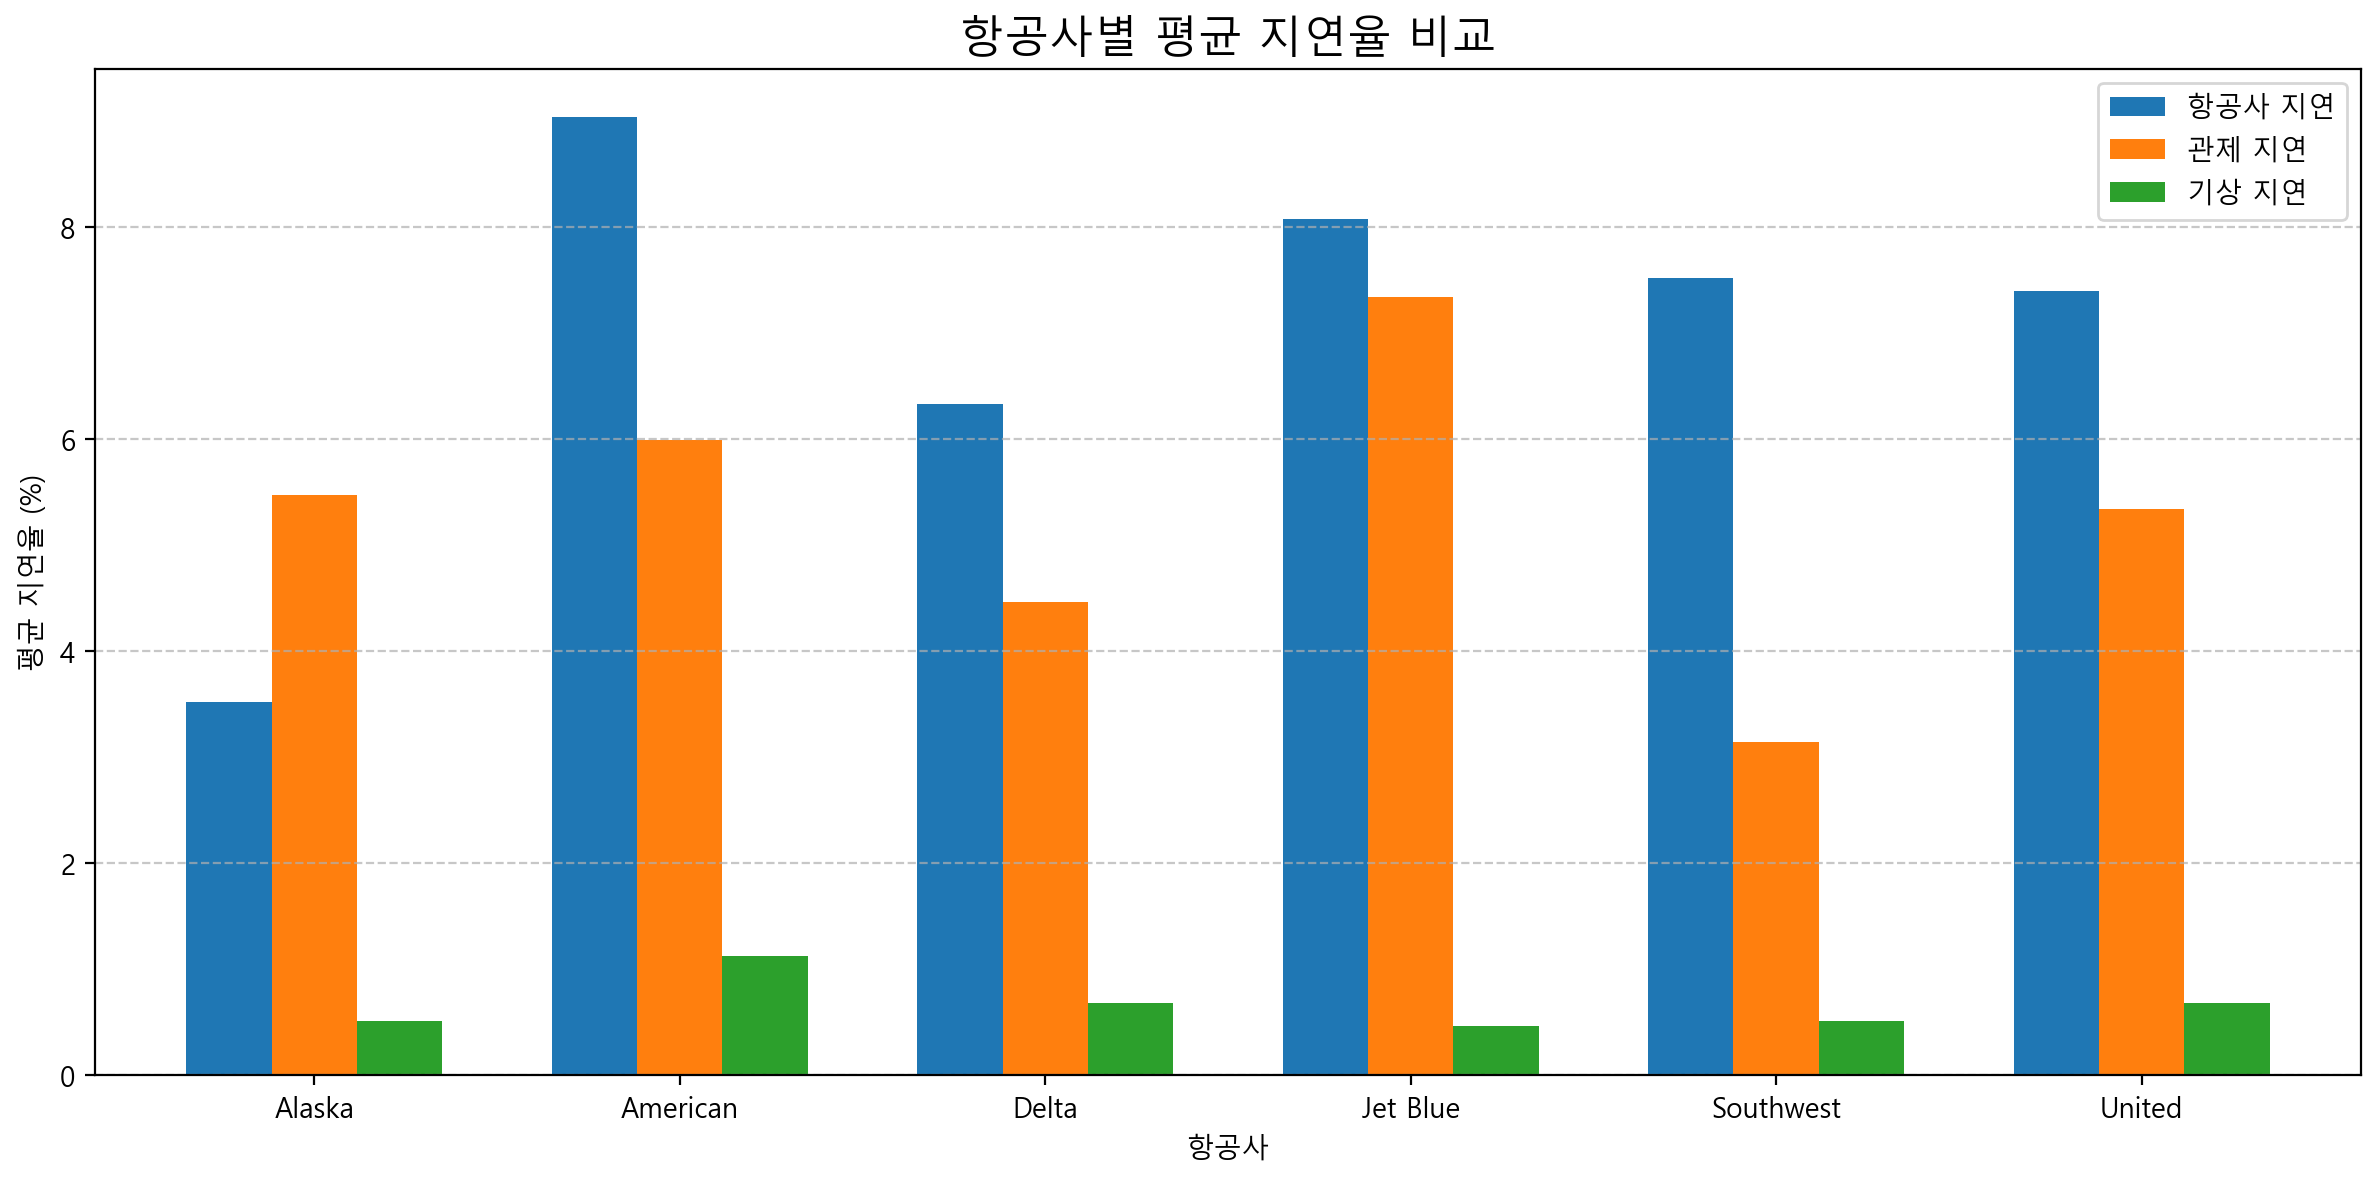

In [277]:
#1. 막대그래프 - 항공사별 평균 지연율


# 항공사별 평균 지연율 계산
delay_means = df_clean.groupby('airline')[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean()

# 시각화를 위한 정렬: 항공사 이름 기준
delay_means = delay_means.sort_index()


# 막대그래프 그리기
delay_means.plot(kind='bar', figsize=(12, 6), width=0.7)
plt.title('항공사별 평균 지연율 비교', fontsize=16)
plt.ylabel('평균 지연율 (%)')
plt.xlabel('항공사')
plt.xticks(rotation=0)
plt.legend(['항공사 지연', '관제 지연', '기상 지연'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

🔎 항공사별 운항 분석:

**1. 안정성을 갖춘 항공사**:   
Alaska: 관제 지연 제외한 모든 평균값이 가장 낮음 (표준편차도 낮음)   
(carrier: 3.52%, atc: 5.47%, weather: 0.51%)
➡️ Alaska는 항공기 지연률이 가장 안정적인 항공사로 판단할 수 있음

**2. 서비스 개선이 필요한 항공사**:
- American: 전체적으로 평균이 높고 편차가 큼
➡️ 내부 운영 개선, 기상 대책 필요
- Delta: weather delay는 평균, carrier/atc delay가 큼
➡️ 내부 개선과 항로 재배치 고려 필요

## 2. 데이터 전처리

### 2-1. 결측치 탐색
- 결측치가 있는 변수: `pct_carrier_delay`, `pct_atc_delay`, `pct_weather_delay` (각 28건)

### 2-2. 결측치 처리    
- 결측치는 세 가지 방식으로 처리 예정
  1. dropna(): 결측치 제거
  2. fillna(): 전체 평균으로 채움
  3. groupby + transform(): airline 그룹별 평균으로 채움
- 이후 각 처리 방식에 따라 지연률 분포 비교 예정


In [278]:
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

In [279]:
# 각 열별 결측치 비율
df.isna().mean().round(3)

pct_carrier_delay    0.001
pct_atc_delay        0.001
pct_weather_delay    0.001
airline              0.000
dtype: float64

In [280]:
# 결측치 포함된 행 보기
m_df = df[df.isnull().any(axis=1)]
m_df.head(5)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
4809,NaN,NaN,NaN,Jet Blue
6123,NaN,NaN,NaN,Jet Blue
7069,NaN,NaN,NaN,Delta
9241,NaN,NaN,NaN,Delta
12081,NaN,NaN,NaN,United


In [281]:
m_df['airline'].value_counts()

airline
Delta       12
United      12
Jet Blue     2
American     2
Name: count, dtype: int64

In [282]:
# 결측치 처리 > 방법 설명
# 1. 제거
df_clean = df.dropna()
df_clean

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [283]:
#2. 대표값으로 대체
df_filled = df.fillna(df.mean(numeric_only=True))
df_filled

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [284]:
#3. airline 별 평균으로 대체
df_group_fill = df.copy()
for col in ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']:
  df_group_fill[col] = df.groupby('airline')[col].transform(lambda x:x.fillna(x.mean()))
df_group_fill.isna().sum()

pct_carrier_delay    0
pct_atc_delay        0
pct_weather_delay    0
airline              0
dtype: int64

In [285]:
#  결측치 처리한 데이터의 통계량 비교
d_clean = df_clean.describe().add_prefix('drop_')
d_filled = df_filled.describe().add_prefix('filled_')
d_group = df_group_fill.describe().add_prefix('group_')
d_comp = pd.concat([d_clean, d_filled, d_group], axis=1)
d_comp.T

,count,mean,std,min,25%,50%,75%,max
drop_pct_carrier_delay,33440.0,7.041475,4.497596,0.0,4.145455,6.356893,9.140474,100.000000
drop_pct_atc_delay,33440.0,5.089962,4.718647,0.0,2.146565,3.900000,6.630238,100.000000
drop_pct_weather_delay,33440.0,0.684776,1.073743,0.0,0.000000,0.316002,0.935161,33.333333
filled_pct_carrier_delay,33468.0,7.041475,4.495714,0.0,4.147084,6.359631,9.136141,100.000000
filled_pct_atc_delay,33468.0,5.089962,4.716672,0.0,2.148281,3.903367,6.625000,100.000000
filled_pct_weather_delay,33468.0,0.684776,1.073294,0.0,0.000000,0.316655,0.934579,33.333333
group_pct_carrier_delay,33468.0,7.041531,4.495773,0.0,4.147084,6.357260,9.136141,100.000000
group_pct_atc_delay,33468.0,5.090018,4.716727,0.0,2.148281,3.903367,6.626106,100.000000
group_pct_weather_delay,33468.0,0.684786,1.073301,0.0,0.000000,0.316655,0.934579,33.333333


In [286]:
d_comp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   drop_pct_carrier_delay    8 non-null      float64
 1   drop_pct_atc_delay        8 non-null      float64
 2   drop_pct_weather_delay    8 non-null      float64
 3   filled_pct_carrier_delay  8 non-null      float64
 4   filled_pct_atc_delay      8 non-null      float64
 5   filled_pct_weather_delay  8 non-null      float64
 6   group_pct_carrier_delay   8 non-null      float64
 7   group_pct_atc_delay       8 non-null      float64
 8   group_pct_weather_delay   8 non-null      float64
dtypes: float64(9)
memory usage: 940.0+ bytes


☝️결측치 해석
1. 수량
- `dropna`: 33,440건 ➡️ 결측치(28건 제거)
- `filled_`, `group_`: 33,468건 ➡️ 전체 데이터 유지


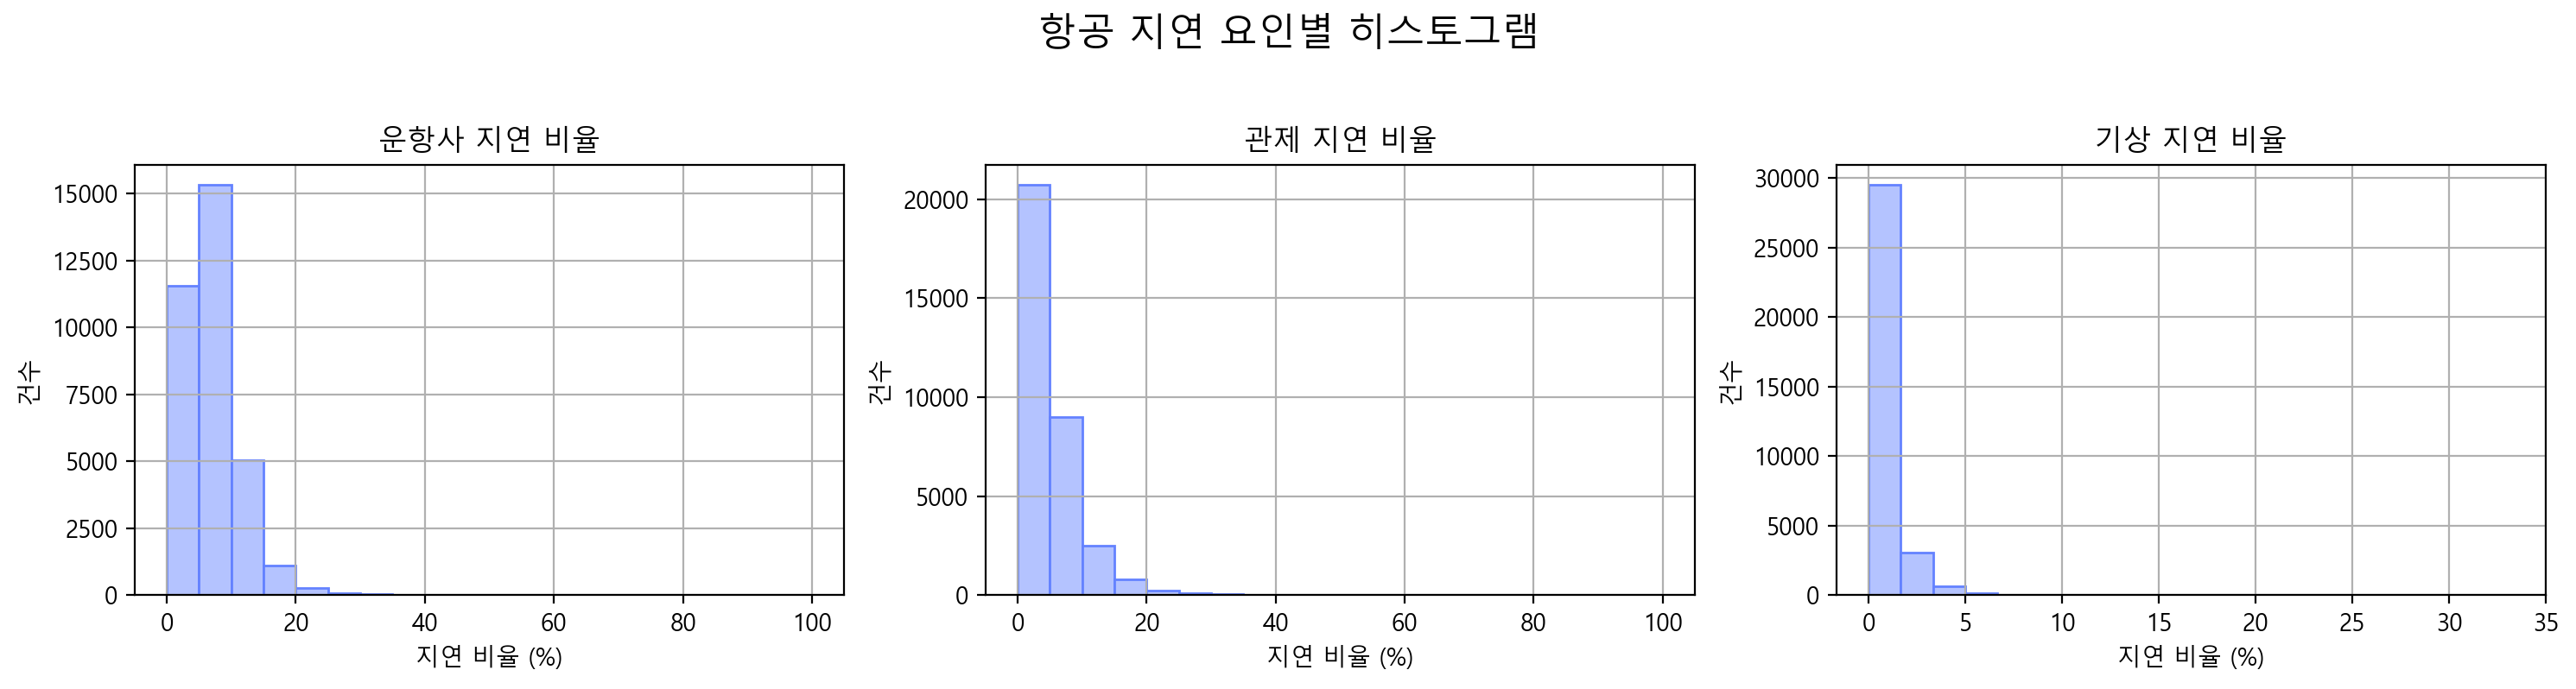

In [287]:
# 시각적 분석 > #1. 히스토그램

# 지연 요인 리스트
delay_cols = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
titles = ['운항사 지연 비율', '관제 지연 비율', '기상 지연 비율']

# Subplot
plt.figure(figsize=(15, 4))

for i, col in enumerate(delay_cols):
    plt.subplot(1, 3, i+1)
    plt.hist(df_clean[col], bins=20, color='#B4C3FF', edgecolor='#6482FF')
    plt.title(titles[i])
    plt.xlabel('지연 비율 (%)')
    plt.ylabel('건수')
    plt.grid(True)

plt.suptitle('항공 지연 요인별 히스토그램', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



> ☝️해석:
> **지연요인별 도수가 차이가 있음.**   
> - 운항사 지연요인은 첫번째 구간이 12천, 두번째구간이 15천   
> - 관제 지연 요인은 첫번째 구간이 2만으로 가장 높음
> - 기상 지연 요인은 첫번째 구간이 3만으로 다른 요인들에 비해 월등히 높음

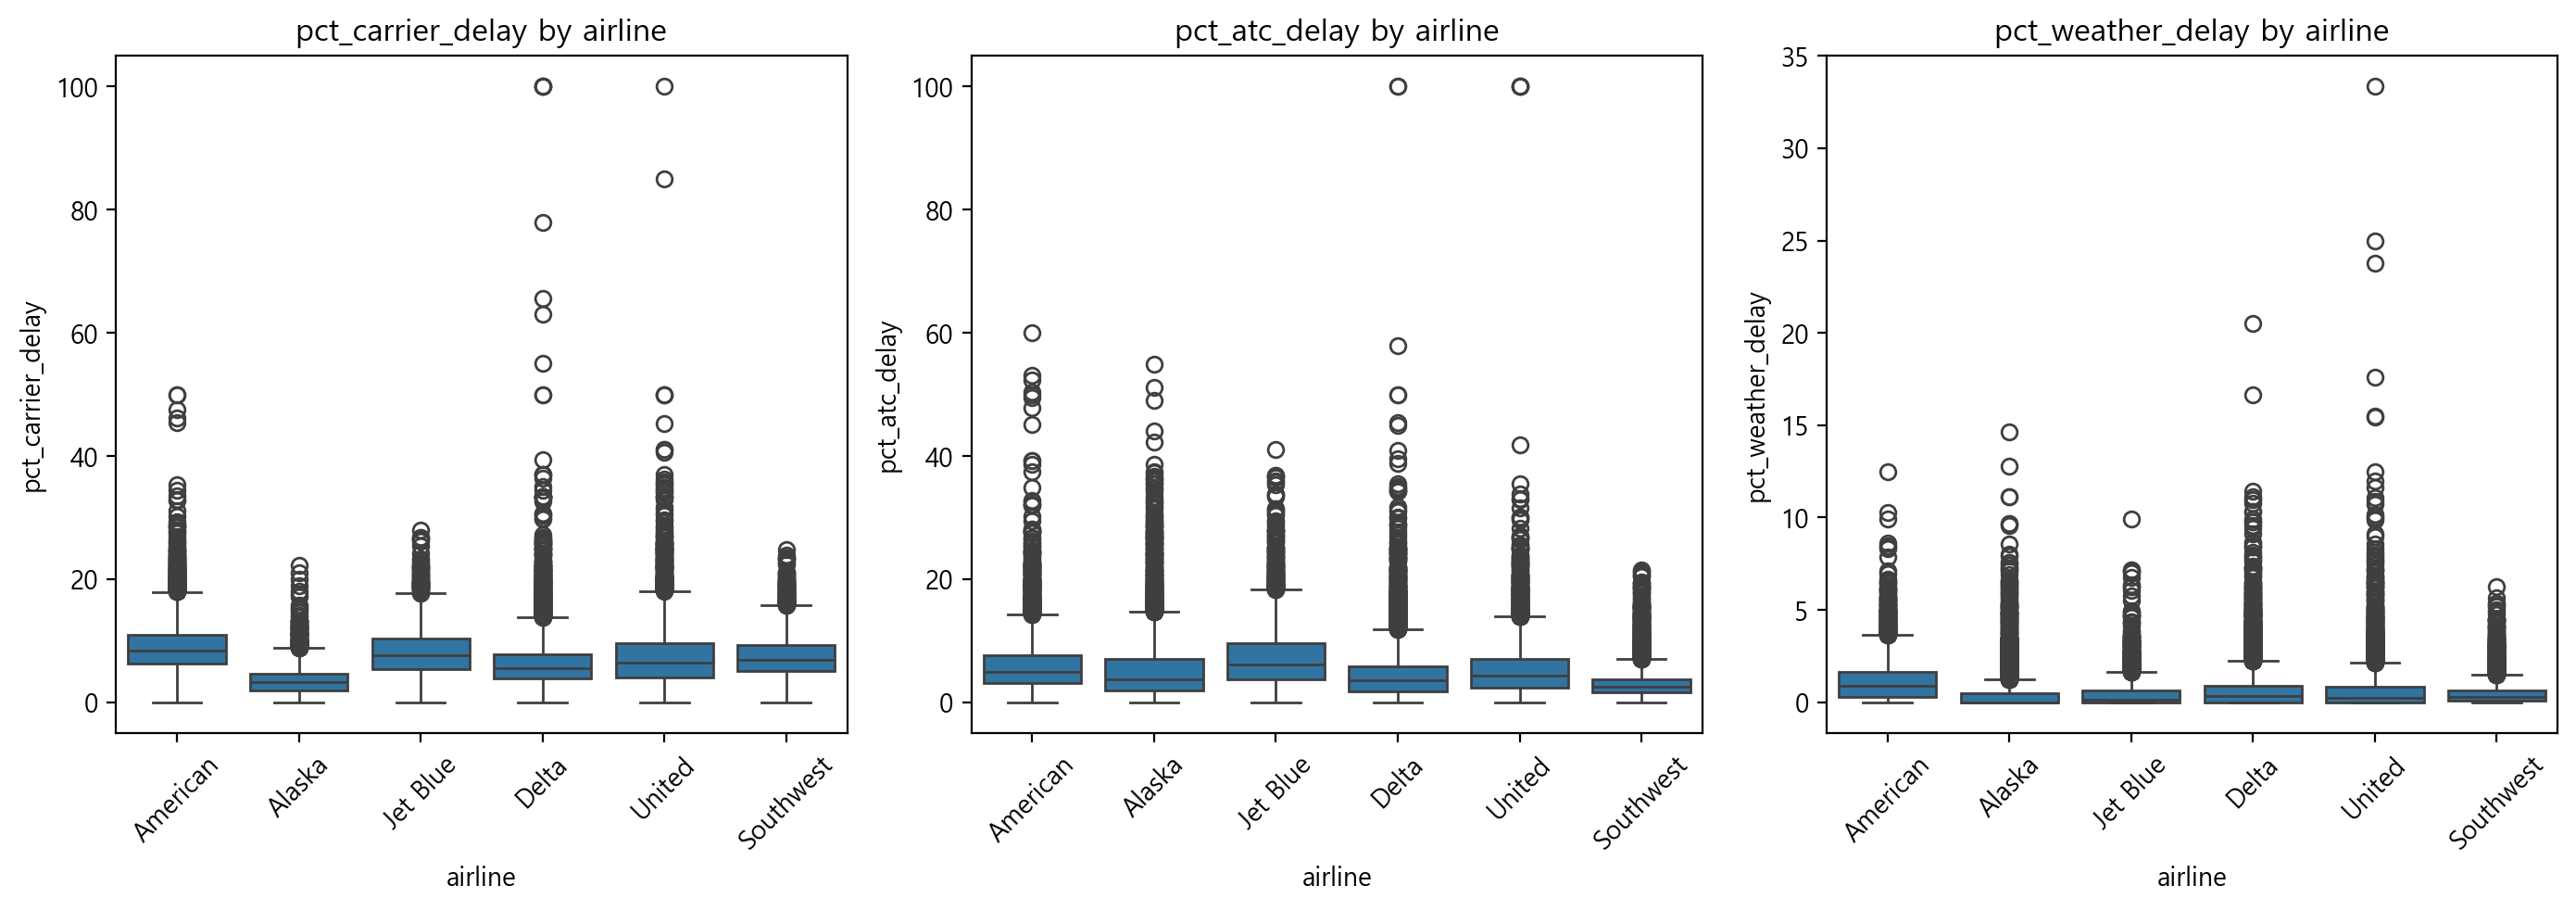

In [288]:
#2. 박스플롯 - 전체, 항공사별 분석


# 전체 항공사별 박스플롯
plt.figure(figsize=(14, 5))
for idx, col in enumerate(['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']):
    plt.subplot(1, 3, idx+1)
    sns.boxplot(x='airline', y=col, data=df_clean)
    plt.title(f"{col} by airline")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> ☝️분석 결과:
> - 전체적으로 지연 비율의 편차는 Delta, United가 큼   

In [289]:
# 추가 분석

# 항공사별 평균 지연율 비교
delay_means = df_clean.groupby('airline')[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean().sort_values(by='pct_carrier_delay', ascending=False)
delay_means


,pct_carrier_delay,pct_atc_delay,pct_weather_delay
airline,,,
American,9.042180,5.993529,1.122920
Jet Blue,8.081843,7.345231,0.465327
Southwest,7.521997,3.147019,0.512611
United,7.398833,5.348133,0.680697
Delta,6.333460,4.462978,0.680765
Alaska,3.521889,5.472672,0.513497


> ☝️ 분석 결과:
> 
> - 항공사별로 어떤 지연 요인에 많이 노출되는지 수치로 확인   
> - 향후 개선 방향 도출을 위한 핵심 표

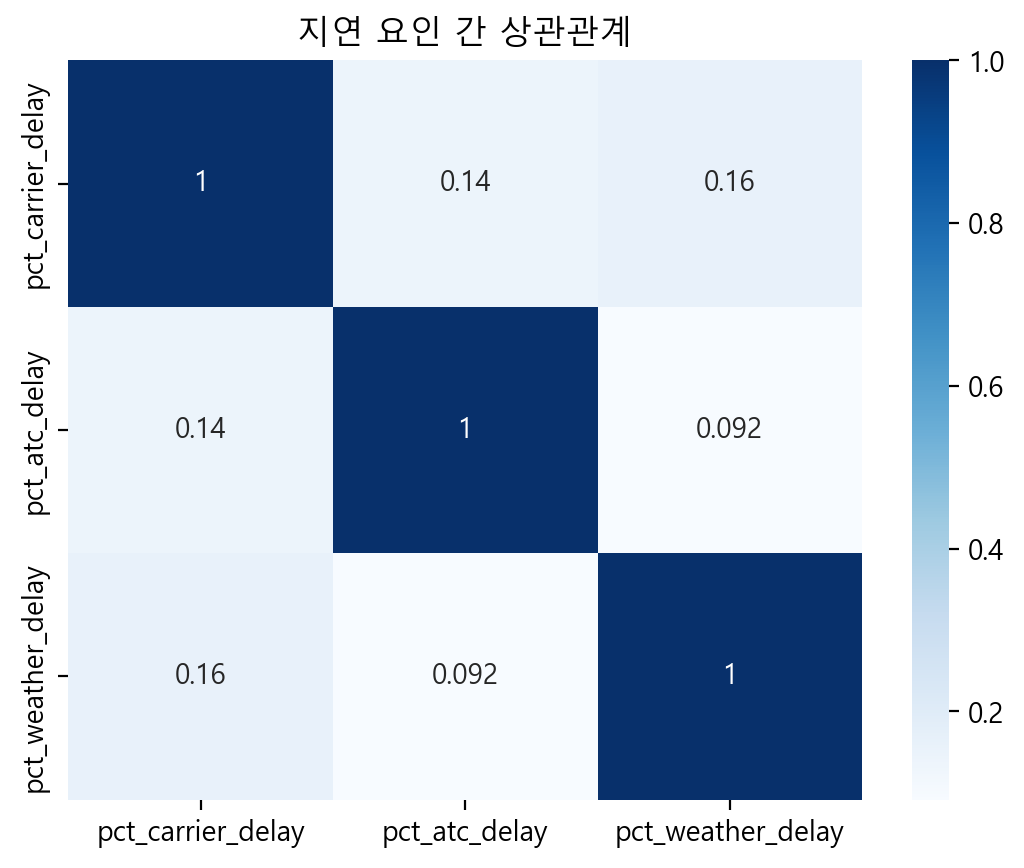

In [290]:
# 상관관계 분석
corr = df_clean[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].corr()

sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("지연 요인 간 상관관계")
plt.show()



> ☝️ 분석 결과:
> - 지연 요인 간 상관관계는 독립적으로 존재. 

In [291]:
#5. 공분산 확인

df_clean[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].cov()


,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,20.228366,3.066107,0.779800
pct_atc_delay,3.066107,22.265627,0.464758
pct_weather_delay,0.779800,0.464758,1.152925


> ☝️ 분석 결과: 
> - 변수 간 분산 크기 비교 가능   
> - 기상/관제 같은 외부 요인이 운항사와 독립적인지 확인

## 개선 방향 예시

| 항공사 | 주요 지연 요인     | 개선 제안                     |
| --- | ------------ | ------------------------- |
| American | 전체적으로 지연이 가장 큼 | 내부 정비 시간 단축, 예비기 대기편 확대   |
| Delta | 관제 지연이 높음    | 출발/도착 시간 분산, 항로 재조정       |
| United | 기상 지연 비중 큼   | 계절별 우회노선 마련, 기상 리스크 대비 전략 |


## 📊 분석 결과 요약

| 분석 항목           | 주요 인사이트                                                                    |
| --------------- | -------------------------------------------------------------------------- |
| **결측치 처리**      | 전체 데이터에서 결측치는 소량 존재했고, 세 가지 방식(dropna, 평균 대체, 그룹 평균 대체)으로 처리하여 비교함         |
| **히스토그램 분포 비교** | `dropna`는 데이터 수 감소, `filled`는 값이 평균 근처로 몰리는 경향, `group` 방식이 원래 분포를 가장 잘 보존 |
| **박스플롯(항공사별)**  | 항공사마다 지연률 분포 편차가 큼. 일부 항공사는 이상치(높은 지연률)가 많이 나타남                            |
| **항공사별 평균 비교**  | Jet Blue는 `carrier_delay`가 가장 높았고, Alaska는 `weather_delay`가 상대적으로 높게 나타남   |
| **상관관계 분석**     | 세 지연 사유 간 강한 상관관계는 없음 → 원인 간 독립적일 가능성 있음                                   |
| **공분산 확인**      | 대체로 낮은 값으로, 지연 사유 간 영향력은 미미함                                               |


## 📋다음 분석 방향 계획

| 분석 방향                   | 목표                  | 기대 효과                           |
| ----------------------- | ------------------- | ------------------------------- |
| **1. 시계열 분석**           | 월별/분기별 지연률 변화 탐색    | 시즌별 또는 특정 시점에 지연이 집중되는 패턴 확인    |
| **2. 항공편 수 대비 지연률**     | 지연률 정규화 (지연/전체편수)   | 단순 지연률이 아닌 **비율 기반의 공정한 비교** 가능 |
| **3. 지역/기상 정보 결합**      | 출발지 기상·지역 변수와의 연계   | 외부 요인이 지연 사유에 미치는 영향 분석         |
| **4. 통계 검정 (예: ANOVA)** | 항공사 간 지연률 차이 유의성 검증 | **단순 평균 비교 이상의 근거 있는 차이 설명** 가능 |
| **5. 클러스터링 등 ML 기법**    | 항공사별 지연 패턴 군집화      | 유사 항공사 그룹 도출 및 이상 탐지 가능         |
